In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# sklearn ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    mpl.rcParams['axes.unicode_minus'] = False
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)

## 위스콘신 유방암 데이터에 XG Boost 알고리즘 적용

In [3]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
#데이터의 분포 확인 - 이 비율이 한족으로 치우치면 가중치를 적용하던지 층화 추출 고려
print(cancer_df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

# 학습 데이터와 훈련 데이터 분할
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.1, random_state=42)
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [9]:
#xgboost를 이용하는 경우의 데이터 생성
import xgboost as xgb
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [11]:
#하이퍼 파라미터
params = { 'max_depth':3,
          'eta': 0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

#룬련 데이터와 검증 데이터 생성
wlist = [(dtrain,'train'),(dtest,'eval') ]

#모델 생성
xgb_model = xgb.train(params = params , dtrain=dtrain ,
                      num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

#예측
pred_probs = xgb_model.predict(dtest)
print(pred_probs[:10],3)


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	train-logloss:0.11729	eval-logloss:0.16766
[20]	train-logloss:0.10969	eval-logloss:0.15820
[2

[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08695
[177]	train-logloss:0.00695	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:0.00685	eval-logloss:0.08658
[184]	train-logloss:0.00683	eval-logloss:0.08659
[185]	train-logloss:0.00681	eval-logloss:0.08661
[186]	train-logloss:0.00680	eval-logloss:0.08637
[187]	train-logloss:0.00678	eval-logloss:0.08637
[188]	train-logloss:0.00676	eval-logloss:0.08630
[189]	train-logloss:0.00675	eval-logloss:0.08610
[190]	train-logloss:

In [12]:
#확률을 가지고 실제 클래스를 예측
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print(preds[:10])

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [20]:
#평가 지표 확인
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

#오차 행렬
confusion = confusion_matrix( y_test, preds)
print(confusion)

#정확도
accuracy = accuracy_score(y_test , preds)
print(accuracy)
#정밀도 - True로 판정한 거 중에서 실제 True인 비율(잘못 검색되면 안되는 경우 중요)
precision = precision_score(y_test , preds)
print(precision)
#재현율 - 실제로 True인 것 중에서 True로 판정한 비율(정보 검색에서 중요)
recall = recall_score(y_test, preds)
print(recall)

#f1_score : 정밀도와 재현율의 조화 평균(데이터가 불균형할 때 중요)
f1 = f1_score(y_test,preds)
print(f1)

#roc_auc - 1에 가까울수록 좋은 수치
roc_auc = roc_auc_score(y_test, pred_probs)
print(roc_auc)

[[35  2]
 [ 1 76]]
0.9736842105263158
0.9743589743589743
0.987012987012987
0.9806451612903225
0.995085995085995


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

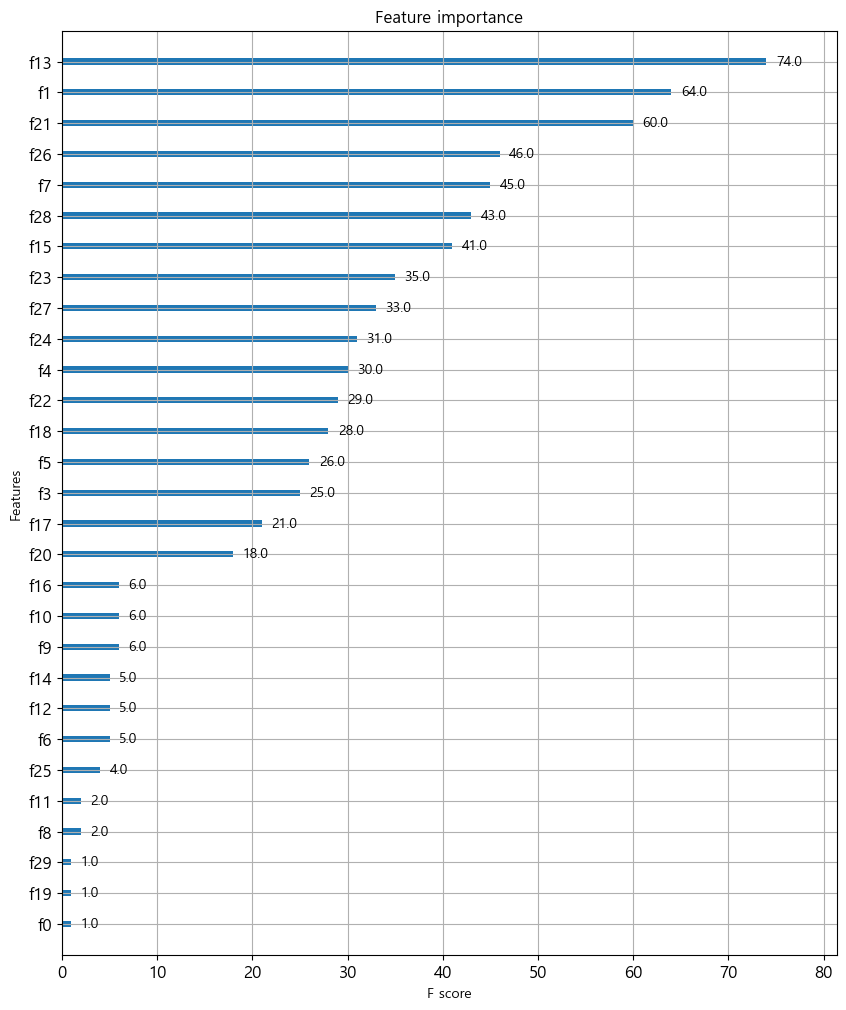

In [25]:
#피처의 중요도 확인
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

## 위스콘신 유방암 데이터에 Light GBM 적용

In [28]:
from lightgbm import LGBMClassifier

#예측기의 개수를 400으로 해서 LightGBM 모델 생성
lgbm_clf = LGBMClassifier(n_estimators = 400)

#평가 데이터를 확인
evals = [(X_test, y_test)]

#훈련
lgbm_clf.fit(X_train, y_train, eval_metric="logloss", eval_set=evals)

[LightGBM] [Info] Number of positive: 280, number of negative: 175
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615385 -> initscore=0.470004
[LightGBM] [Info] Start training from score 0.470004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(n_estimators=400)

In [29]:
preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]
print(preds[:10])
print(pred_proba[:10])

[1 0 1 1 1 1 1 1 1 0]
[8.28620993e-01 7.23756339e-06 9.99323043e-01 6.58068071e-01
 9.99993983e-01 9.99999999e-01 9.99999992e-01 9.99999895e-01
 9.99999505e-01 8.89639438e-09]


In [30]:
#오차 행렬
confusion = confusion_matrix( y_test, preds)
print(confusion)

#정확도
accuracy = accuracy_score(y_test , preds)
print(accuracy)
#정밀도 - True로 판정한 거 중에서 실제 True인 비율(잘못 검색되면 안되는 경우 중요)
precision = precision_score(y_test , preds)
print(precision)
#재현율 - 실제로 True인 것 중에서 True로 판정한 비율(정보 검색에서 중요)
recall = recall_score(y_test, preds)
print(recall)

#f1_score : 정밀도와 재현율의 조화 평균(데이터가 불균형할 때 중요)
f1 = f1_score(y_test,preds)
print(f1)

#roc_auc - 1에 가까울수록 좋은 수치
roc_auc = roc_auc_score(y_test, pred_probs)
print(roc_auc)

[[32  5]
 [ 2 75]]
0.9385964912280702
0.9375
0.974025974025974
0.9554140127388535
0.995085995085995
